## Connect to the GIS

In [3]:
from arcgis.gis import GIS
from getpass import getpass
password = getpass()
gis = GIS("https://esriwebgis.webgistesting.net/portal", "atma.mani", password)

········


# Visualize the aggregate result

In [4]:
search_results = gis.content.search("Reconstructed_Tracks*")
search_results

[<Item title:"Reconstructed_Tracks_WXXBKC" type:Feature Service owner:admin>,
 <Item title:"Reconstructed_Tracks_MO1UC2" type:Feature Service owner:admin>]

In [5]:
map1 = gis.map()
map1

In [6]:
agg_result = search_results[0]
map1.add_layer(agg_result)

In [8]:
# display hurricanes during any 20 years
map1.start_time = '1852'
map1.end_time = '1872'

## Analyze the attribute info

In [9]:
agg_result_FL = agg_result.layers
agg_result_FL

[<FeatureLayer url:"http://ESRIwebgis.webgistesting.net/server/rest/services/Hosted/Reconstructed_Tracks_WXXBKC/FeatureServer/0">]

In [10]:
query_result = agg_result_FL[0].query(out_fields = "*", returnGeometry = False)
att_data_frame = query_result.df
att_data_frame.head()

,ANY_basin,ANY_center,ANY_iso_time,ANY_name,ANY_nature,ANY_size,ANY_sub_basin,ANY_track_type,COUNT,COUNT_Wind,...,VAR_latitude,VAR_longitude,VAR_num,VAR_pres_wmo1,VAR_pres_wmo_,VAR_season,VAR_wind_wmo1,VAR_wind_wmo_,globalid,serial_num
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,SI,reunion,1848-01-11 06:00:00,XXXX848002,NR,0,MM,main,6.0,6.0,...,69.869667,17.237667,0.0,0.0,0.0,0.0,0.000000,0.000000,{39CC2082-8E91-4DF4-A6EF-19FF0083893E},1848011S15057
9,NA,atcf,1852-09-22 00:00:00,NOT NAMED,TS,50000,MM,main,36.0,36.0,...,28.048159,25.096286,0.0,0.0,0.0,0.0,74.865499,100.634921,{60EF7236-A492-4888-A8D4-D09BF08282D5},1852266N16302
17,SI,reunion,1854-03-01 06:00:00,XXXX854011,NR,0,MM,main,4.0,4.0,...,4.430000,0.042500,0.0,0.0,0.0,0.0,0.000000,0.000000,{EA818C35-E7CF-4B4C-AD20-A7AB1C47417F},1854060S15069
37,NA,atcf,1858-09-17 00:00:00,NOT NAMED,TS,80000,MM,main,32.0,32.0,...,87.758548,54.076280,0.0,0.0,0.0,0.0,54.920887,75.806452,{1217FACB-B96B-485C-84DF-B209617A0ECD},1858260N18319
49,SI,reunion,1860-01-11 06:00:00,XXXX860037,NR,0,MM,main,9.0,9.0,...,39.069444,22.152500,0.0,0.0,0.0,0.0,0.000000,0.000000,{328E45DE-F957-4FA4-B506-81B16ACB7443},1860011S13068


In [11]:
att_data_frame.shape

(568, 94)

In [12]:
att_data_frame.columns

Index(['ANY_basin', 'ANY_center', 'ANY_iso_time', 'ANY_name', 'ANY_nature',
       'ANY_size', 'ANY_sub_basin', 'ANY_track_type', 'COUNT', 'COUNT_Wind',
       'COUNT_basin', 'COUNT_center', 'COUNT_iso_time', 'COUNT_latitude',
       'COUNT_longitude', 'COUNT_name', 'COUNT_nature', 'COUNT_num',
       'COUNT_pres_wmo1', 'COUNT_pres_wmo_', 'COUNT_season', 'COUNT_size',
       'COUNT_sub_basin', 'COUNT_track_type', 'COUNT_wind_wmo1',
       'COUNT_wind_wmo_', 'END_DATETIME', 'MAX_Wind', 'MAX_latitude',
       'MAX_longitude', 'MAX_num', 'MAX_pres_wmo1', 'MAX_pres_wmo_',
       'MAX_season', 'MAX_wind_wmo1', 'MAX_wind_wmo_', 'MEAN_Wind',
       'MEAN_latitude', 'MEAN_longitude', 'MEAN_num', 'MEAN_pres_wmo1',
       'MEAN_pres_wmo_', 'MEAN_season', 'MEAN_wind_wmo1', 'MEAN_wind_wmo_',
       'MIN_Wind', 'MIN_latitude', 'MIN_longitude', 'MIN_num', 'MIN_pres_wmo1',
       'MIN_pres_wmo_', 'MIN_season', 'MIN_wind_wmo1', 'MIN_wind_wmo_',
       'RANGE_Wind', 'RANGE_latitude', 'RANGE_longitude',

## Has the number of hurricanes increased over time?

<Container object of 51 artists>

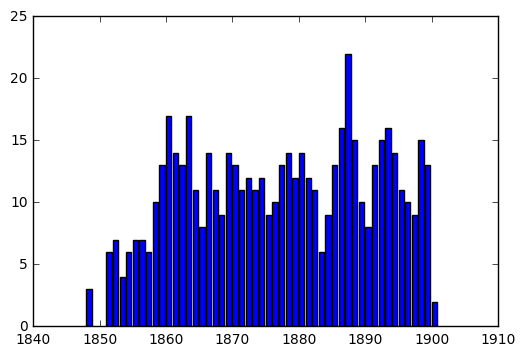

In [13]:
sorted_df = att_data_frame.sort_values('MEAN_season')
hurricane_freq = sorted_df.groupby('MEAN_season').count()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.asarray(hurricane_freq.axes[0])
y = np.asarray(hurricane_freq['COUNT'])
fig, ax = plt.subplots()
ax.bar(x, y)

### Fit a trend line

[  8.51067944e-02  -1.48434647e+02]


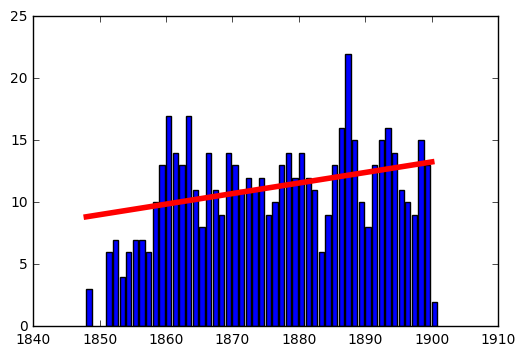

In [14]:
fit1 = np.polyfit(x, y, deg=1)
print(fit1)

ax.plot(x, x*fit1[0] + fit1[1], color='red', linewidth=4)

fig

# Has the duration of hurricanes increased over time?

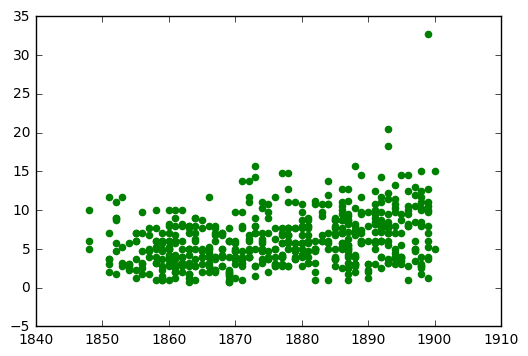

In [15]:
intensity_df = sorted_df[['MEAN_season', 'MAX_wind_wmo_','VAR_pres_wmo1', 'TRACK_DURATION']]
np_season = np.asarray(intensity_df['MEAN_season'])
np_duration = np.asarray(intensity_df['TRACK_DURATION'] / (1000*60*60*24))

fig2, ax2 = plt.subplots()
ax2.scatter(np_season, np_duration, color='green')

[  7.77924491e-02  -1.39884370e+02]


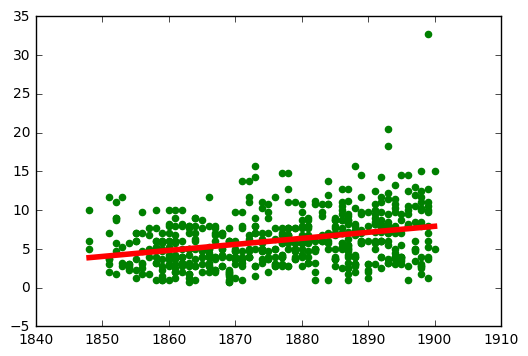

In [16]:
fit2_1 = np.polyfit(np_season, np_duration, deg=1)
ax2.plot(np_season, np_season * fit2_1[0] + fit2_1[1], linewidth=4, color='red')
print(fit2_1)

fig2